# Retail Sales Data set of Alcohol and Liquor

### Introduction

This project analyzer a detailed dataset of alcohol sales (2017-2020), including wine, liquor, and beers. By examining monthly sales patterns, top-performing products, and supplier contributions. Predicting future demand, this analysis will help stakeholders maximize revenue and streamline operations.

### Required Libraries

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.impute import KNNImputer
from pylab import rcParams
from pathlib import Path

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import  AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

### Load Dataset

In [7]:
# Create directory for images 
Path("img").mkdir(parents=True, exist_ok=True)

# Set default figure size
rcParams['figure.figsize'] = (4, 4)

# Tell pandas how to display floats
pd.options.display.float_format = "{:,.2f}".format

In [8]:
path = 'Downloads/Warehouse_and_Retail_Sales.csv'

In [9]:
df = pd.read_csv(path, lineterminator='\n')

### Initial Exploration

In [11]:
df.head()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.00,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.00,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.00,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.00,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.00,0.00


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307645 entries, 0 to 307644
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   YEAR              307645 non-null  int64  
 1   MONTH             307645 non-null  int64  
 2   SUPPLIER          307478 non-null  object 
 3   ITEM CODE         307645 non-null  object 
 4   ITEM DESCRIPTION  307645 non-null  object 
 5   ITEM TYPE         307644 non-null  object 
 6   RETAIL SALES      307642 non-null  float64
 7   RETAIL TRANSFERS  307645 non-null  float64
 8   WAREHOUSE SALES   307645 non-null  float64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.1+ MB


In [13]:
df.isnull().sum()

YEAR                  0
MONTH                 0
SUPPLIER            167
ITEM CODE             0
ITEM DESCRIPTION      0
ITEM TYPE             1
RETAIL SALES          3
RETAIL TRANSFERS      0
WAREHOUSE SALES       0
dtype: int64

In [14]:
df.shape

(307645, 9)

In [15]:
df.nunique()

YEAR                    4
MONTH                  12
SUPPLIER              396
ITEM CODE           34056
ITEM DESCRIPTION    34822
ITEM TYPE               8
RETAIL SALES        10674
RETAIL TRANSFERS     2504
WAREHOUSE SALES      4895
dtype: int64

In [16]:
df.dropna()

,YEAR,MONTH,SUPPLIER,ITEM CODE,ITEM DESCRIPTION,ITEM TYPE,RETAIL SALES,RETAIL TRANSFERS,WAREHOUSE SALES
0,2020,1,REPUBLIC NATIONAL DISTRIBUTING CO,100009,BOOTLEG RED - 750ML,WINE,0.00,0.00,2.00
1,2020,1,PWSWN INC,100024,MOMENT DE PLAISIR - 750ML,WINE,0.00,1.00,4.00
2,2020,1,RELIABLE CHURCHILL LLLP,1001,S SMITH ORGANIC PEAR CIDER - 18.7OZ,BEER,0.00,0.00,1.00
3,2020,1,LANTERNA DISTRIBUTORS INC,100145,SCHLINK HAUS KABINETT - 750ML,WINE,0.00,0.00,1.00
4,2020,1,DIONYSOS IMPORTS INC,100293,SANTORINI GAVALA WHITE - 750ML,WINE,0.82,0.00,0.00
...,...,...,...,...,...,...,...,...,...
307640,2020,9,DOPS INC,97896,ST PETERS ORGANIC ENG ALE NR 12/CS - 16.9OZ,BEER,0.00,0.00,1.00
307641,2020,9,ANHEUSER BUSCH INC,97918,STELLA ARTOIS 2/12 NR - 11.2OZ,BEER,372.45,315.00,"3,586.88"
307642,2020,9,HEINEKEN USA,97942,TECATE 4/6 LNNR - 12OZ,BEER,7.79,0.00,4.00
307643,2020,9,RELIABLE CHURCHILL LLLP,97950,S SMITH WINTER WELCOME NR 12/CS - 18.7OZ,BEER,0.00,0.00,2.00


In [17]:
# Set style
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

### Visualizations

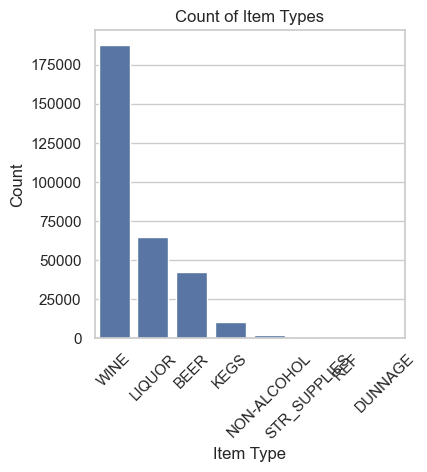

In [19]:
# Count of Item Types
sns.countplot(data=df, x="ITEM TYPE", order=df["ITEM TYPE"].value_counts().index)
plt.title("Count of Item Types")
plt.xlabel("Item Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

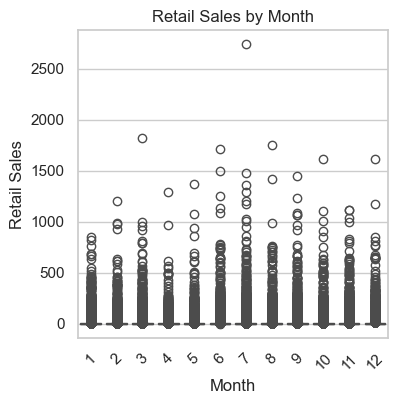

In [20]:
# Boxplot of Retail Sales by Month
sns.boxplot(data=df, x="MONTH", y="RETAIL SALES")
plt.title("Retail Sales by Month")
plt.xlabel("Month")
plt.ylabel("Retail Sales")
plt.xticks(rotation=45)
plt.show()

<Axes: title={'center': 'Monthly Retail Sales Trend'}, xlabel='DATE'>

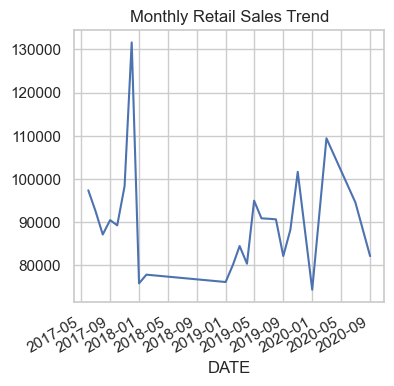

In [21]:
# Monthly Trend of Retail Sales
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str))
monthly_sales = df.groupby('DATE')['RETAIL SALES'].sum()
monthly_sales.plot(title="Monthly Retail Sales Trend")

<Axes: title={'center': 'Top 10 Suppliers by Sales'}, xlabel='SUPPLIER'>

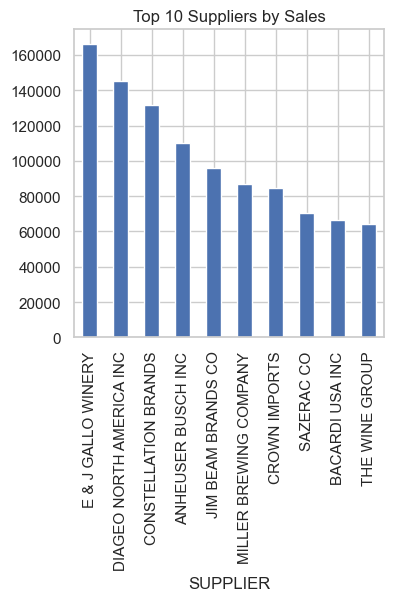

In [22]:
top_suppliers = df.groupby('SUPPLIER')['RETAIL SALES'].sum().sort_values(ascending=False).head(10)
top_suppliers.plot(kind='bar', title="Top 10 Suppliers by Sales")

Numeric columns in the dataset: ['YEAR', 'MONTH', 'RETAIL SALES', 'RETAIL TRANSFERS', 'WAREHOUSE SALES']


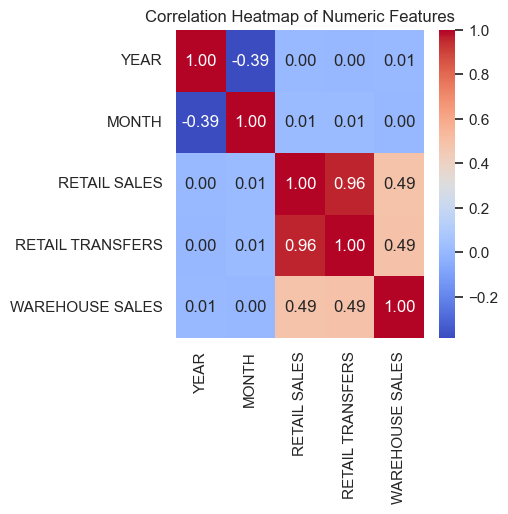

In [23]:
# Correlation Heat map (for numerical columns)
numeric_df = df.select_dtypes(include=[np.number])
print('Numeric columns in the dataset:', numeric_df.columns.tolist())


if numeric_df.shape[1] >= 4:    
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
else:
    print('Not enough numeric columns to create a correlation heatmap.')

Text(0, 0.5, 'Total Retail Sales')

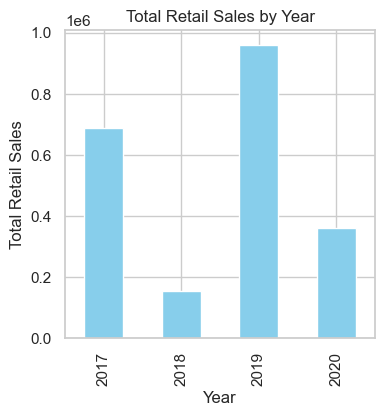

In [24]:
# Retail Sales by Year
yearly_sales = df.groupby("YEAR")["RETAIL SALES"].sum()
yearly_sales.plot(kind="bar", color="skyblue")
plt.title("Total Retail Sales by Year")
plt.xlabel("Year")
plt.ylabel("Total Retail Sales")

### Modeling and Prediction

In [26]:
df_clean = df.drop(columns=["ITEM CODE", "ITEM DESCRIPTION"])

In [27]:
df['DATE'] = pd.to_datetime(df['YEAR'].astype(str) + '-' + df['MONTH'].astype(str) + '-01', errors='coerce')

In [28]:
df_clean["MONTH_NUM"] = df_clean["DATE"].dt.month
df_clean["YEAR_NUM"] = df_clean["DATE"].dt.year
df_clean = df_clean.drop(columns=["DATE"])

In [29]:
le_supplier = LabelEncoder()
le_item_type = LabelEncoder()

df_clean["SUPPLIER_ENC"] = le_supplier.fit_transform(df_clean["SUPPLIER"])
df_clean["ITEM_TYPE_ENC"] = le_item_type.fit_transform(df_clean["ITEM TYPE"])


In [30]:
df_clean = df_clean.drop(columns=["SUPPLIER", "ITEM TYPE"])

In [31]:
target = "RETAIL SALES"

X = df_clean.drop(columns=[target])
y = df_clean[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=537)

In [33]:
valid_idx = ~np.isnan(y_train)
X_train, y_train = X_train[valid_idx], y_train[valid_idx]

valid_idx = ~np.isnan(y_test)
X_test, y_test = X_test[valid_idx], y_test[valid_idx]

In [34]:
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    return {
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R²": r2
    }

In [35]:
models = [
    ("Linear Regression", LinearRegression()),
    ("Ridge", Ridge()),
    ("Lasso", Lasso()),
    ("ElasticNet", ElasticNet()),
    ("Decision Tree", DecisionTreeRegressor(max_depth=10)),
    ("AdaBoost", AdaBoostRegressor(n_estimators=50)),
    ("KNN", KNeighborsRegressor(n_neighbors=3)),
]

In [36]:
results = []
for name, model in models:
    score = evaluate_model(name, model, X_train, y_train, X_test, y_test)
    results.append(score)


In [37]:
results_df = pd.DataFrame(results).sort_values("R²", ascending=False)
results_df

,Model,MAE,MSE,RMSE,R²
4,Decision Tree,1.66,36.26,6.02,0.95
1,Ridge,1.68,44.94,6.70,0.94
0,Linear Regression,1.68,44.94,6.70,0.94
2,Lasso,1.75,45.67,6.76,0.94
6,KNN,1.83,64.33,8.02,0.91
3,ElasticNet,3.92,118.52,10.89,0.84
5,AdaBoost,6.43,151.92,12.33,0.80


Text(0, 0.5, 'Model')

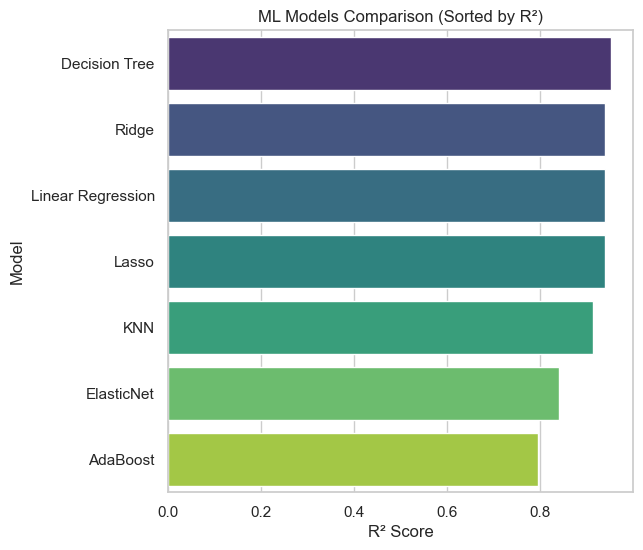

In [38]:
plt.figure(figsize=(6, 6))
sns.barplot(data=results_df, x="R²", y="Model", hue="Model", palette="viridis", legend=False)
plt.title("ML Models Comparison (Sorted by R²)")
plt.xlabel("R² Score")
plt.ylabel("Model")